In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings("ignore")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-boston-houseprice-data/boston.csv
/kaggle/input/usarrests/USArrests.csv
/kaggle/input/diabetes-data-set/diabetes.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

<font color='purple'>
      
      
## CONTENT:

1. [WHAT IS MACHINE LEARNING?](#1)
1. [SUPERVISED LEARNING](#2)
    * [REGRESSION](#3)
        * [LINEAR REGRESSION](#4)
            * [SIMPLE LINEAR REGRESSION](#5)
            * [MULTIPLE LINEAR REGRESSION](#6)
            * [PRINCIPLE COMPONENT REGRESSION](#7)
            * [PARTIAL LEAST SQUARES REGRESSION](#8)
            * [RIDGE REGRESSION](#9)
            * [LASSO REGRESSION](#10)
            * [ELASTIC NET REGRESSION](#11)
            * [SUPPORT VECTOR REGRESSION](#12)
        * [NON-LINEAR REGRESSION](#13)
            * [K-NEAREST NEIGHBORS (KNN) REGRESSION](#14)
            * [SUPPORT VECTOR REGRESSION](#15)
            * [REGRESSION TREES](#16)
                * [BAGGED TREES](#17)
                * [RANDOM FORESTS](#18)
            * [GRADIENT BOOSTING MACHINES](#19)
                * [ADAPTIVE BOOSTING (AdaBoost)](#20)
                * [EXTREME GRADIENT BOOSTING (xgBOOST)](#21)
                * [LIGHT GRADIENT BOOST MACHINE](#22)
                * [CATEGORICAL BOOSTING (CatBoost)](#23)
        * [ARTIFICIAL NEURAL NETWORK (ANN)](#24)
    * [CLASSIFICATION](#25)
        * [LOGISTIC REGRESSION](#26)
        * [NAVIE BAYES CLASSIFIER](#27)
        * [K-NEAREST NEIGHBOOR CLASSIFIER](#28)
        * [CLASSIFICATION TREES](#29)
        * [RANDOM FOREST CLASSIFICATION](#30)
        * [GRADIENT BOOSTING MACHINES](#31)
            * [ADAPTIVE BOOSTING (AdaBoost)](#32)
            * [LIGHT GRADIENT BOOST MACHINE](#33)
            * [EXTREME GRADIENT BOOSTING (xgBOOST)](#34)
            * [CATEGORICAL BOOSTING (CatBoost)](#35)
1. [UNSUPERVISED LEARNING](#36)
    * [K-MEANS CLUSTERING](#37)
    * [HIERARCHICAL CLUSTERING](#38)
    * [PRINCIPLE COMPONENT ANALYSIS](#39)

<a id="1"></a>

# WHAT IS MACHINE LEARNING?

* Machine Learning is the science (and art) of programming computers so they can learn from data.
* There are so many different types of Machine Learning systems that it is useful to classify them in broad categories based on:
    - Supervised Learning
    - Unsupervised Learning
    - Semisupervised Learning
    - Reinforcement Learning
    
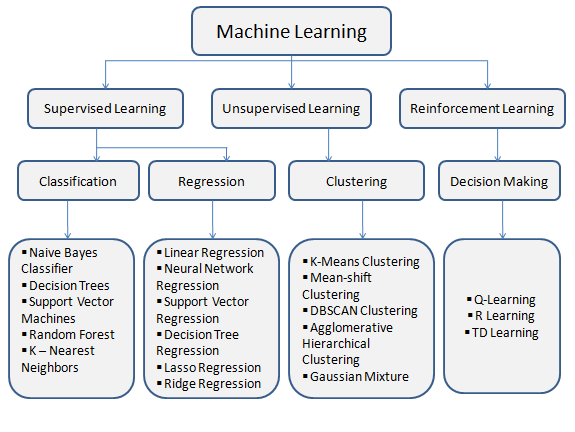

<a id="2"></a>


# **SUPERVISED LEARNING**

* In supervised learning, we are given a data set and **already know what our correct output should look like**, having the idea that there is a relationship between the input and the output.
* Supervised learning problems are categorized into

    -> Regression
    
    -> Classification
    
 

 ### **Classification:**
    - We are instead trying to predict results in a **discrete output**.
    - Which means we are trying to map input variables into **discrete categories**. 
    - Can be evaluated using **accuracy**


#### **DISCRETE VARIABLE** is a variable whose value is obtained by counting.

   * Example for discrete variable:
           - number of students present
           - students’ grade level

<a id="3"></a>


# **REGRESSION**

* Linear Regression
* Nonlinear Regression

 - We are trying to predict results within a **continuous output**.         
 - Which means we are trying to map input variables to some **continuous function**.
 - Can be evaluated using **root mean squared error**
 
 #### **CONTINUOUS VARIABLE** is a variable whose value is obtained by measuring.

   * Example for continuous variable:
           - distance traveled between classes
           - time it takes to get to school



<a id="4"></a>

# **LINEAR REGRESSION:**
   * Linear regression always uses a linear equation:
   
   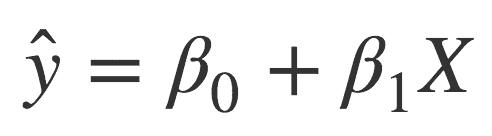
   
   * Where x is the explanatory variable and Y is the dependent variable.
   * In multiple linear regression, multiple equations are added together but the parameters are still linear.
   
   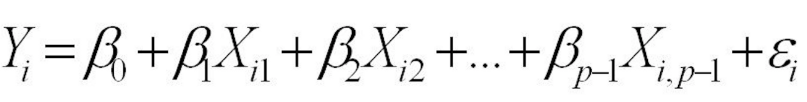

In [3]:
data=pd.read_csv("../input/the-boston-houseprice-data/boston.csv")
data=data.dropna()
data.head(10)

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
5     18.7  394.12   5.21  28.7  
6     15.2  395.60  12.43  22.9  
7     15.2  396.90  19.15  27.1  
8     15.2  386.63  29.93  16.5  
9     15.2  386.71  17.10  18.9

### **Attribute Information**

**Input features in order:**
1) CRIM: per capita crime rate by town

2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

3) INDUS: proportion of non-retail business acres per town

4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]

6) RM: average number of rooms per dwelling

7) AGE: proportion of owner-occupied units built prior to 1940

8) DIS: weighted distances to five Boston employment centres

9) RAD: index of accessibility to radial highways

10) TAX: full-value property-tax rate per $10,000 [$/10k]

11) PTRATIO: pupil-teacher ratio by town

12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

13) LSTAT: % lower status of the population

**Output variable:**
1) MEDV: Median value of owner-occupied homes in $1000's [k$]

In [4]:
# Quick Check data:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 59.3 KB


In [5]:
data.describe().T

count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506.0   12.653063    7.141062    1.73000    6.950000   11.36000   
MEDV     506.0   22.532806    9.197104    5.00000   17.025000   21.20000   

                75%       max  
CRIM       3.677083   88.9762  
ZN        12.500000  100.0000  
INDUS     18.100000   27.7400  
CHAS       0.000000    1.0000  
NOX        0.624000    0.8710  
RM         6.623500    8.7800  
AGE       94.075000  100.0000  
DIS        5.188425   12.1265  
RAD       24.000000   24.0000  
TAX      666.000000  711.0000  
PTRATIO   20.200000   22.0000  
B        396.225000  396.9000  
LSTAT     16.955000   37.9700  
MEDV      25.000000   50.0000

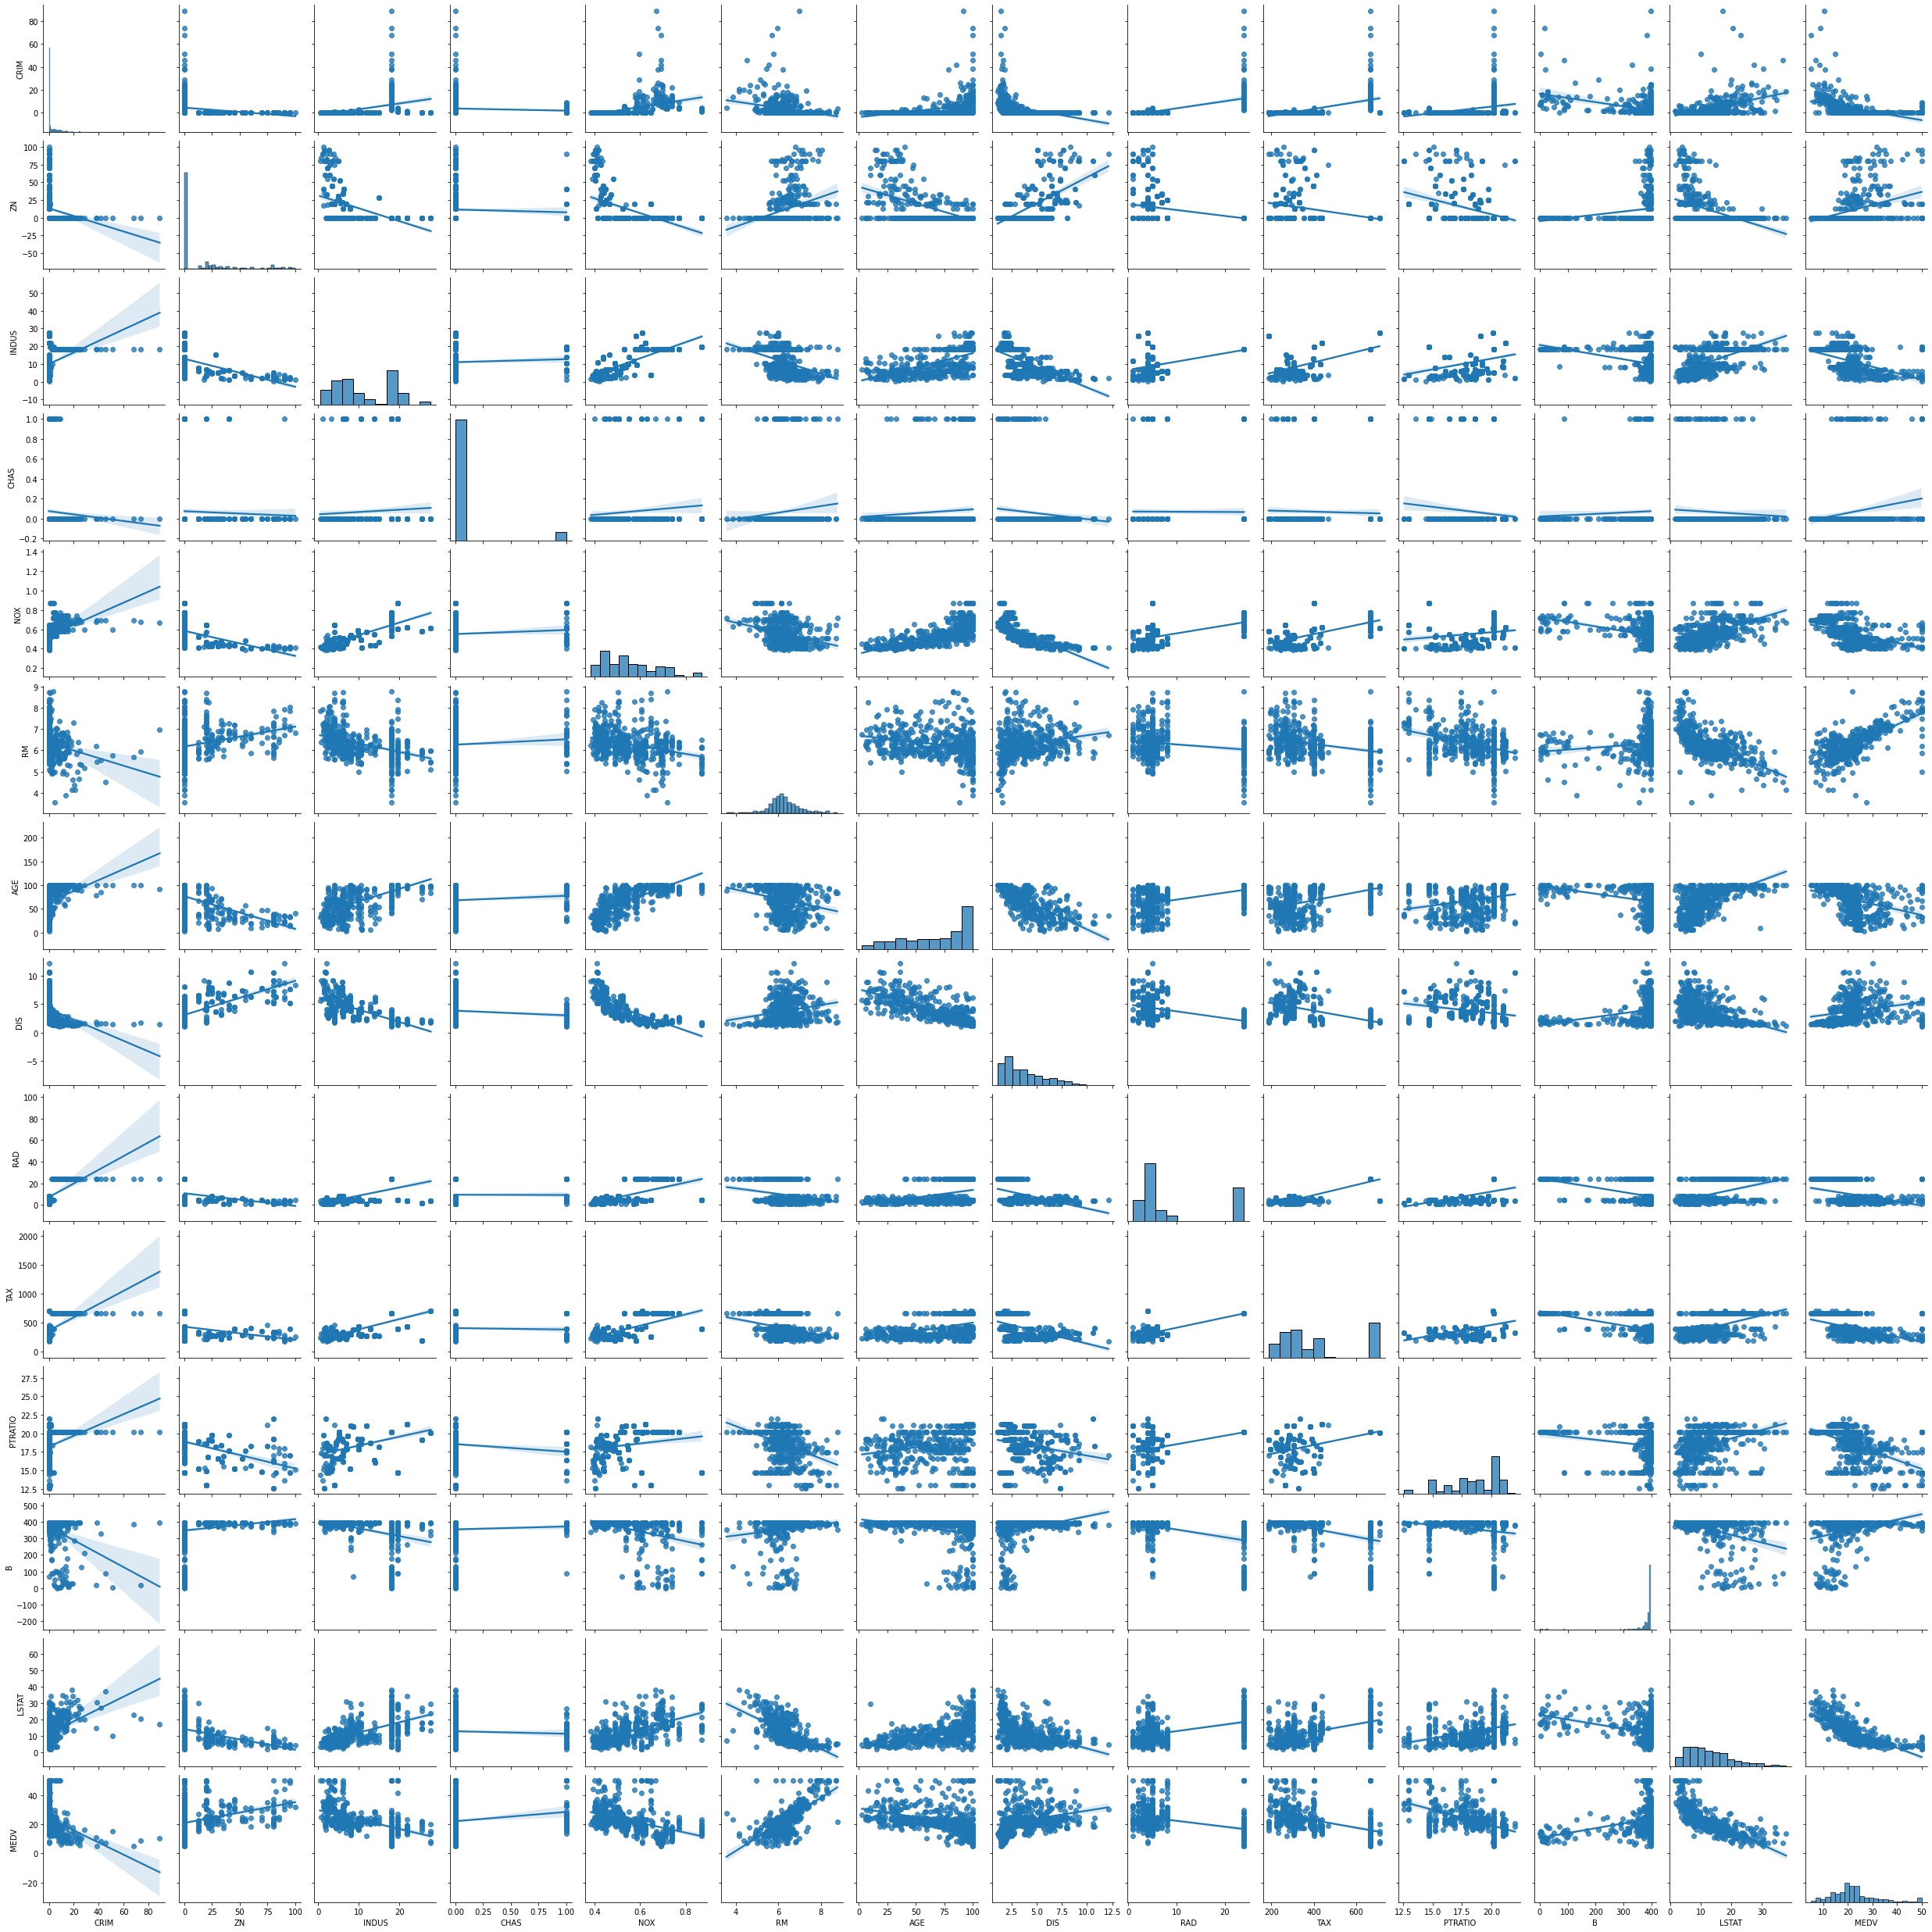

In [6]:
sns.pairplot(data,kind="reg")

<a id="5"></a>

# **SIMPLE LINEAR REGRESSION**

* Used to predict the value of a variable based on the value of another variable.

In [7]:
sns.jointplot(x="RM",y="MEDV",data=data,kind="reg");

## **1) MODELLING with SCIKIT-LEARN**

In [8]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()

In [9]:
X=data[["RM"]]
y=data[["MEDV"]]
model=linear_reg.fit(X,y)

## **INTERCEPT | CONSTANT**
* The intercept (sometimes called the “constant”) in a **regression model represents the mean value of the response variable when all of the predictor variables in the model are equal to zero**.

## **COEFFICIENT**
* Slope
* In linear regression, coefficients are the values that multiply the predictor values. Suppose you have the following regression equation: 
    ### **y = 3X + 5** 
- In this equation:

- **+3 is the coefficient**
- X is the predictor
- **+5 is the constant / intercept**

In [10]:
print("Intercept | Constant of Linear Regression Equation: ",model.intercept_)
print("Coefficient of Linear Regression Equation: ",model.coef_)

Intercept | Constant of Linear Regression Equation:  [-34.67062078]
Coefficient of Linear Regression Equation:  [[9.10210898]]


## **R- SQUARE (R²)**
* R-Squared shows how well the data fit the regression model.
* Can take any values between 0 to 1.

In [11]:
model.score(X,y) # Gives us R² value.

0.48352545599133423

# PREDICTION

In [12]:
new_room=[[9],[5],[11]]
model.predict(new_room)

array([[47.24836005],
       [10.83992413],
       [65.45257802]])

## **2) MODELLING with STATSMODELS**
* Gives more statistical results.

In [13]:
import statsmodels.formula.api as sm
linearModel=sm.ols("MEDV ~ RM",data)
statModel=linearModel.fit()
statModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           2.49e-74
Time:                        14:25:43   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
statModel.params

Intercept   -34.670621
RM            9.102109
dtype: float64

In [15]:
statModel.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [16]:
statModel.fittedvalues[1:5] # Predict some values.

1    23.774021
2    30.728032
3    29.025938
4    30.382152
dtype: float64

In [17]:
# Formula of our linear regression:
print("MEDV = " + str("%.2f" % statModel.params[0])+ " + RM" + "x" +str("%.2f"%statModel.params[1]))

MEDV = -34.67 + RMx9.10


Text(0.5, 1.0, 'Formula: MEDV = -34.67 + RMx9.10')

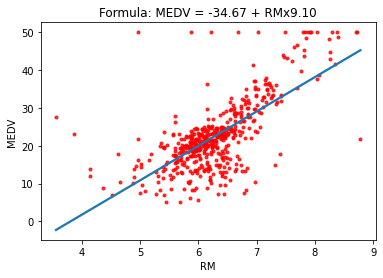

In [18]:
m=sns.regplot(data.RM,data.MEDV,ci=None,scatter_kws={"color":"r","s":9});
m.set_title("Formula: MEDV = -34.67 + RMx9.10")

# **ERRORS**

## 1)MEAN SQUARED ERROR:

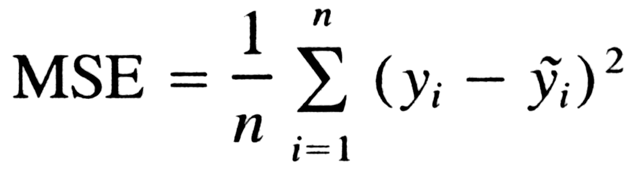

In [19]:
from sklearn.metrics import mean_squared_error,r2_score

In [20]:
MSE=mean_squared_error(y,statModel.fittedvalues)
print("Mean Squared Error: ",MSE)

Mean Squared Error:  43.60055177116956


## 2) ROOT MEAN SQUARED ERROR:



In [21]:
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error: ",RMSE)

Root Mean Squared Error:  6.603071389222561


# RESIDUALS
* The difference between an observed value of the response variable and the value of the response variable predicted from the regression line.

In [22]:
statModel.resid[0:10]

0   -1.175746
1   -2.174021
2    3.971968
3    4.374062
4    5.817848
5    4.844060
6    2.848742
7    5.592404
8   -0.083355
9   -1.078442
dtype: float64

In [23]:
plt.plot(statModel.resid);

* To create a successful model, residual values should be examined.

<a id="6"></a>

# **MULTIPLE LINEAR REGRESSION**

* Uses two or more independent variables to predict the outcome of a dependent variable.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X=data[["CRIM","INDUS","AGE"]]
y=data["MEDV"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

## **1) MODELLING with SCIKIT-LEARN**

In [26]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()

In [27]:
multi_linear_model=linear_reg.fit(X_train,y_train)
print("Intercept | Constant of Equation: ",multi_linear_model.intercept_)
print("-----------------------------------------------------------------------------------------------------")
print("Coefficient of Equation: ",multi_linear_model.coef_)

Intercept | Constant of Equation:  30.3735258146891
-----------------------------------------------------------------------------------------------------
Coefficient of Equation:  [-0.25704074 -0.441659   -0.02251161]


# PREDICTION

Let's predict:

- CRIM: 0.002
- INDUS: 5.5
- AGE: 30

In [28]:
values_for_prediction=[[0.002],[5.5],[30]]
values_for_prediction=pd.DataFrame(values_for_prediction).T
values_for_prediction

0    1     2
0  0.002  5.5  30.0

In [29]:
multi_linear_model.predict(values_for_prediction)

array([27.26853902])

## **ERRORS**

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
print("Train Error: ",np.sqrt(mean_squared_error(y_train,multi_linear_model.predict(X_train))))
print("Test Error: ",np.sqrt(mean_squared_error(y_test,multi_linear_model.predict(X_test))))

Train Error:  8.065626534810926
Test Error:  7.158428359456869


## **2) MODELLING with STATSMODELS**

In [32]:
import statsmodels.api as sm
stat_multi_linear=sm.OLS(y_train,X_train)
stat_multi_linear_model=stat_multi_linear.fit()
stat_multi_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.693
Model:                            OLS   Adj. R-squared (uncentered):              0.691
Method:                 Least Squares   F-statistic:                              264.7
Date:                Fri, 05 Aug 2022   Prob (F-statistic):                    9.41e-90
Time:                        14:25:50   Log-Likelihood:                         -1430.4
No. Observations:                 354   AIC:                                      2867.
Df Residuals:                     351   BIC:                                      2878.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.5114      0.096     -5.345      0.000      -0.700      -0.323
INDUS         -0.3234      0.142     -2.280      0.023      -0.602      -0.044
AGE            0.3532      0.024     14.542      0.000       0.305       0.401
==============================================================================
Omnibus:                       21.574   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.378
Skew:                           0.529   Prob(JB):                     3.76e-05
Kurtosis:                       2.490   Cond. No.                         15.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **MODEL TUNING**
## **CROSS - VALIDATION**
* Cross-Validation is a statistical method of evaluating and comparing learning algorithms by dividing data into two segments:
            - One used to learn or train a model
            - Other used to validate the model
* In typical cross-validation, the training and validation sets must cross-over in successive rounds such that each data point has a chance of being validated against.

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
cross_val_score(multi_linear_model,X_train,y_train,cv=10,scoring="r2").mean()

0.21158985483176013

In [35]:
print("Train Error: ",np.sqrt(-cross_val_score(multi_linear_model,
                X_train,
                y_train,
                cv=10,
                scoring="neg_mean_squared_error")).mean()
)

Train Error:  8.171691665824323


In [36]:
print("Test Error: ",np.sqrt(-cross_val_score(multi_linear_model,
                                             X_test,
                                             y_test,
                                             cv=10,
                                             scoring="neg_mean_squared_error")).mean()
     )

Test Error:  6.960755804696454


<a id="7"></a>


# **PRINCIPLE COMPONENT REGRESSION**

* PCR is a regression analysis technique that is based on principal component analysis (PCA).
* More specifically, PCR is used for estimating the unknown regression coefficients in a standard linear regression model.
* Firstly, we will use PCA
* Then we create a regression model for PCA results.

In [37]:
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [38]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict

In [39]:
X=data.drop(["MEDV"],axis=1)
y=data["MEDV"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (354, 13)
X_test (152, 13)
y_train (354,)
y_test (152,)


## **PCA (Principle Component Analysis)**
* PCA projects observations onto the principal components of the feature matrix that retain the most variance.


In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [41]:
pca=PCA()

X_reduce_train=pca.fit_transform(scale(X_train))
X_reduce_train[0:1,:]

array([[-2.17355849, -0.09214218, -0.64277491, -0.35288314, -0.85654175,
        -0.31467137,  0.64637207,  0.10664345, -0.35909418,  0.42506893,
         0.49490507,  0.39492735,  0.00316688]])

In [42]:
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)[0:10]

array([46.2 , 57.49, 67.19, 74.27, 80.39, 85.79, 89.82, 92.84, 95.02,
       96.79])

* For first variable in the data set variance rate = 46.2
* For first and second variables (together) has variance rate = 57.49
* We can see that when number of variables increase, variance rate also increase.

In [43]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [44]:
pcr_model=lr.fit(X_reduce_train,y_train)

In [45]:
print("Intercept | Constant of Equation: ",pcr_model.intercept_)
print("-----------------------------------------------------------------------------------------------------")
print("Coefficient of Equation: ",pcr_model.coef_)

Intercept | Constant of Equation:  23.01581920903955
-----------------------------------------------------------------------------------------------------
Coefficient of Equation:  [-2.29164273  2.9553752   3.26825157  0.01713963 -2.09531028  0.90714996
 -0.97253419  1.45514907  0.26672992  0.96748222 -1.31705718 -2.5819853
 -2.76041332]


# ERRORS

In [46]:
y_pred=pcr_model.predict(X_reduce_train)
y_pred[0:5]

array([25.28876411, 23.70313309, 22.15603301, 21.26400891, 16.81402917])

In [47]:
from sklearn.metrics import mean_squared_error,r2_score

In [48]:
r2_score(y_train,y_pred)

0.7434997532004697

In [49]:
X_reduce_test=pca.fit_transform(scale(X_test))
y_pred_t=pcr_model.predict(X_reduce_test)

In [50]:
print("Train Error: ",np.sqrt(mean_squared_error(y_pred,y_train)))
print("Test Error: ",np.sqrt(mean_squared_error(y_pred_t,y_test)))

Train Error:  4.748208239685937
Test Error:  7.370443154047127


# **MODEL TUNING**
## **K-FOLD CROSS - VALIDATION**

* In K-Folds Cross Validation, we divide our data into k different groups.
* We use k-1 groups to train our data and leave the final group as test data. 
* The average error value obtained as a result of k experiments indicates the validity of our model.

In [51]:
from sklearn import model_selection

In [52]:
kfold_cv=model_selection.KFold(n_splits=10,
                              shuffle=True,
                              random_state=1)

In [53]:
RMSE=[]

for i in np.arange(1,X_reduce_train.shape[1] + 1):
    score=np.sqrt(-1*model_selection.cross_val_score(lr,
                                                    X_reduce_train[:,:i],
                                                    y_train.ravel(),
                                                    cv=kfold_cv,
                                                    scoring="neg_mean_squared_error").mean())
    RMSE.append(score)

In [54]:
import matplotlib.pyplot as plt

plt.plot(RMSE,"-*")
plt.xlabel("Number of Component")
plt.ylabel("RMSE")
plt.show()

* In order to graph, we can see that 12 component gives lowest error.

<a id="8"></a>


# **PARTIAL LEAST SQUARES REGRESSION**

* Reduces the predictors to a smaller set of uncorrelated components and performs least squares regression on these components.
* PLS regression is especially useful when your predictors are highly collinear, or when you have more predictors than observations and ordinary least-squares regression either produces coefficients with high standard errors or fails completely.

In [55]:
from sklearn.cross_decomposition import PLSRegression,PLSSVD

In [56]:
X=data.drop(["MEDV"],axis=1)
y=data["MEDV"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (354, 13)
X_test (152, 13)
y_train (354,)
y_test (152,)


In [57]:
pls_model=PLSRegression(n_components=10).fit(X_train,y_train)
pls_model.coef_

array([[-1.10550839],
       [ 0.80653701],
       [ 0.35028466],
       [ 0.80906655],
       [-1.80813979],
       [ 2.91978931],
       [-0.29442104],
       [-2.94268283],
       [ 2.0920146 ],
       [-1.44508529],
       [-2.06651597],
       [ 1.0207147 ],
       [-3.89029305]])

# PREDICTION

In [58]:
pls_model.predict(X_train)[0:10]

array([[25.28519701],
       [23.70575165],
       [22.15442258],
       [21.24262854],
       [16.81497231],
       [23.33967153],
       [28.97568063],
       [ 6.40204501],
       [24.1005967 ],
       [17.32612921]])

# **ERRORS**

In [59]:
# Train Error:
y_pred=pls_model.predict(X_train)
print("Train RMSE: ",np.sqrt(mean_squared_error(y_train,y_pred)))
print("Train R2 Score: ",r2_score(y_train,y_pred))

Train RMSE:  4.748225962236376
Train R2 Score:  0.7434978384373356


In [60]:
# Test Error:
y_pred=pls_model.predict(X_test)
print("Test RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Test R2 Score: ",r2_score(y_test,y_pred))

Test RMSE:  4.6368878772346775
Test R2 Score:  0.7114503293389159


# **MODEL TUNING**

## **K-Fold CROSS VALIDATION**

In [61]:
k_foldCV=model_selection.KFold(n_splits=10,shuffle=True,random_state=1)
RMSE=[]
for i in np.arange(1,X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score=np.sqrt(-1*model_selection.cross_val_score(pls,
                                                    X_train,
                                                    y_train,
                                                    cv=k_foldCV,
                                                    scoring="neg_mean_squared_error").mean())
    RMSE.append(score)
plt.plot(RMSE,"-*")
plt.xlabel("Number of Component")
plt.ylabel("RMSE")
plt.show()

### - If a regression model uses the **L1** Regularization technique, then it is called **Lasso Regression**
### - If it used the **L2** regularization technique, it’s called **Ridge Regression**

<a id="9"></a>

# **RIDGE REGRESSION**
* Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated.
* Ridge regression adds the “squared magnitude” of the coefficient as the penalty term to the loss function. The highlighted part below represents the L2 regularization element.

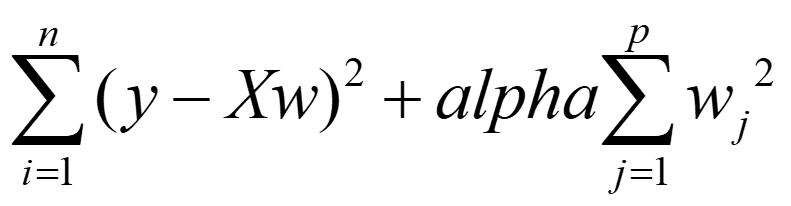

In [62]:
X=data.drop(["MEDV"],axis=1)
y=data["MEDV"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (354, 13)
X_test (152, 13)
y_train (354,)
y_test (152,)


In [63]:
from sklearn.linear_model import Ridge

In [64]:
ridge_model=Ridge(alpha=0.1).fit(X_train,y_train)
# alpha : λ for some formula.
# So alpha=0 means Linear Regression. 
ridge_model.coef_

array([-1.32535034e-01,  3.59944827e-02,  4.38480378e-02,  3.09567615e+00,
       -1.40625952e+01,  4.06131940e+00, -1.20010626e-02, -1.36547356e+00,
        2.39463689e-01, -8.81732204e-03, -8.95518536e-01,  1.18278475e-02,
       -5.49776010e-01])

# PREDICTION

In [65]:
y_pred=ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

4.645978466913542

# **MODEL TUNING**

* Find best λ value for model.

In [66]:
lambdas=10**np.linspace(10,-2,100)*0.5
lambdas[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [67]:
from sklearn.linear_model import RidgeCV
ridge_cv=RidgeCV(alphas=lambdas,
                scoring="neg_mean_squared_error",
                normalize=True)

In [68]:
ridge_cv.fit(X_train,y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [69]:
ridge_cv.alpha_
# We find optimum lambda value.

0.020185086292982747

<a id="10"></a>

# **LASSO REGRESSION**

* Lasso is an acronym for least absolute shrinkage and selection operator, and lasso regression adds the “absolute value of magnitude” of the coefficient as a penalty term to the loss function.



In [70]:
from sklearn.linear_model import Lasso
lasso_model=Lasso(alpha=0.1).fit(X_train,y_train)
lasso_model.coef_

array([-1.22854422e-01,  3.86385849e-02, -4.97188385e-04,  1.48353759e+00,
       -0.00000000e+00,  3.89367421e+00, -1.96048179e-02, -1.10561397e+00,
        2.16673479e-01, -1.05844004e-02, -7.44014516e-01,  1.23959059e-02,
       -6.02281637e-01])

# PREDICTION

In [71]:
y_pred=lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

4.792059433662726

# **MODEL TUNING**

In [72]:
from sklearn.linear_model import LassoCV

In [73]:
lasso_cv=LassoCV(alphas=None,
                cv=10,
                max_iter=10000,
                normalize=True)

In [74]:
lasso_cv.fit(X_train,y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [75]:
lasso_cv.alpha_
# Optimum alpha value

0.0003722775328799811

<a id="11"></a>

# **ELASTIC NET REGRESSION**

* Mixed of L1 (Lasso) and L2 (Ridge).
* Elastic Net first emerged as a result of critique on **Lasso**, whose **variable selection** can be too dependent on data and thus unstable.
* The solution is to combine the **penalties** of **Ridge** regression and lasso to get the best of both worlds.



In [76]:
from sklearn.linear_model import ElasticNet
elNet_model=ElasticNet().fit(X_train,y_train)

In [77]:
print("Intercept | Constant of Equation: ",elNet_model.intercept_)
print("-----------------------------------------------------------------------------------------------------")
print("Coefficient of Equation: ",elNet_model.coef_)

Intercept | Constant of Equation:  40.026994560469866
-----------------------------------------------------------------------------------------------------
Coefficient of Equation:  [-0.11001229  0.04184101 -0.          0.         -0.          1.05561236
  0.01162801 -0.72286557  0.24463354 -0.01172617 -0.73671936  0.01091098
 -0.7935326 ]


# PREDICTION

In [78]:
y_pred=elNet_model.predict(X_test)
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score: ",r2_score(y_test,y_pred))

RMSE:  5.040356769543411
R2 Score:  0.6590505847238239


# **MODEL TUNING**

In [79]:
from sklearn.linear_model import ElasticNetCV

In [80]:
elNet_model_CV=ElasticNetCV(cv=10,random_state=0).fit(X_train,y_train)
elNet_model_CV.alpha_

1.4102889112324044

<a id="12"></a>

# **SUPPORT VECTOR REGRESSION**

In [81]:
from sklearn.svm import LinearSVR

In [82]:
X=data[["RM"]]
y=data[["MEDV"]]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (354, 1)
X_test (152, 1)
y_train (354, 1)
y_test (152, 1)


In [83]:
svr_model=LinearSVR(C=0.01,fit_intercept=True,epsilon=5).fit(X_train,y_train)
# epsilon-insensitive loss function

In [84]:
print("Intercept | Constant of Equation: ",svr_model.intercept_)
print("-----------------------------------------------------------------------------------------------------")
print("Coefficient of Equation: ",svr_model.coef_)

Intercept | Constant of Equation:  [0.3916472]
-----------------------------------------------------------------------------------------------------
Coefficient of Equation:  [3.20958373]


# PREDICTION

In [85]:
y_pred=svr_model.predict(X_test)

In [86]:
print("MSE: ",mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

MSE:  55.69371048971035
RMSE:  7.462821885165848


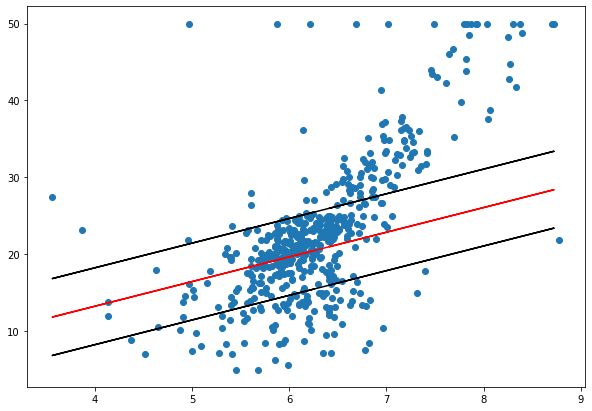

In [87]:
plt.figure(figsize=(10,7))
plt.scatter(x=data["RM"],y=data["MEDV"])
plt.plot(X_test,y_pred,color="red")
plt.plot(X_test,y_pred+5,color="black")
plt.plot(X_test,y_pred-5,color="black")
plt.show()

# **MODEL TUNING**

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
grid = {
    "C":np.linspace(0.01,10),
    "epsilon":np.linspace(0.01,10)
}
svr_gridSearch=LinearSVR(fit_intercept=True,max_iter=10000)

In [90]:
grid_svr = GridSearchCV(svr_gridSearch, grid, scoring='neg_mean_absolute_error', cv=5)

In [91]:
grid_svr.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearSVR(max_iter=10000),
             param_grid={'C': array([ 0.01      ,  0.21387755,  0.4177551 ,  0.62163265,  0.8255102 ,
        1.02938776,  1.23326531,  1.43714286,  1.64102041,  1.84489796,
        2.04877551,  2.25265306,  2.45653061,  2.66040816,  2.86428571,
        3.06816327,  3.27204082,  3.47591837,  3.67979592,  3.88367347,
        4.08755102,  4.29142857,  4.49530612,  4.69918367,  4.90306122,
        5.1069...
        4.08755102,  4.29142857,  4.49530612,  4.69918367,  4.90306122,
        5.10693878,  5.31081633,  5.51469388,  5.71857143,  5.92244898,
        6.12632653,  6.33020408,  6.53408163,  6.73795918,  6.94183673,
        7.14571429,  7.34959184,  7.55346939,  7.75734694,  7.96122449,
        8.16510204,  8.36897959,  8.57285714,  8.77673469,  8.98061224,
        9.1844898 ,  9.38836735,  9.5922449 ,  9.79612245, 10.        ])},
             scoring='neg_mean_absolute_error')

In [92]:
best_SVR=grid_svr.best_estimator_
best_SVR.fit(X_train,y_train)

LinearSVR(C=9.796122448979592, epsilon=1.029387755102041, max_iter=10000)

In [93]:
y_pred=best_SVR.predict(X_test)
print("MSE: ",mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

MSE:  40.734991047474765
RMSE:  6.382396967243166


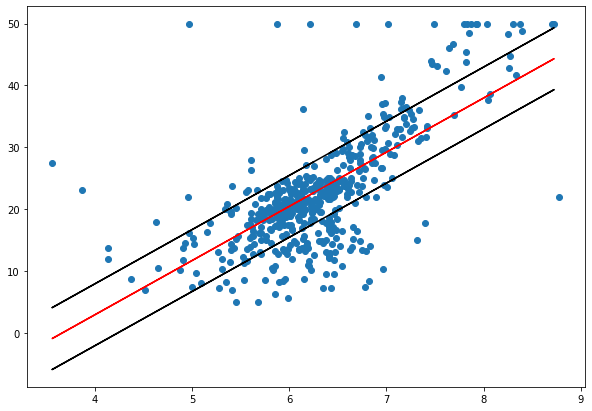

In [94]:
plt.figure(figsize=(10,7))
plt.scatter(x=data["RM"],y=data["MEDV"])
plt.plot(X_test,y_pred,color="red")
plt.plot(X_test,y_pred+5,color="black")
plt.plot(X_test,y_pred-5,color="black")
plt.show()

### Better! 💃

<a id="13"></a>

# **NON-LINEAR REGRESSION**

* Nonlinear regression is a form of regression analysis in which data is fit to a model and then expressed as a mathematical function. 
* Simple Linear Regression relates two variables (X and Y) with a straight line (y = mx + b)
* Non-linear Regression relates the two variables in a nonlinear (curved) relationship.

### > Both Linear and Nonlinear Regression predict Y responses from an X variable (or variables).

### > Nonlinear Regression can show a prediction of population growth over time.

<a id="14"></a>

# **K-NEAREST NEIGHBORS (KNN) REGRESSION**

In [95]:
from sklearn.neighbors import KNeighborsRegressor

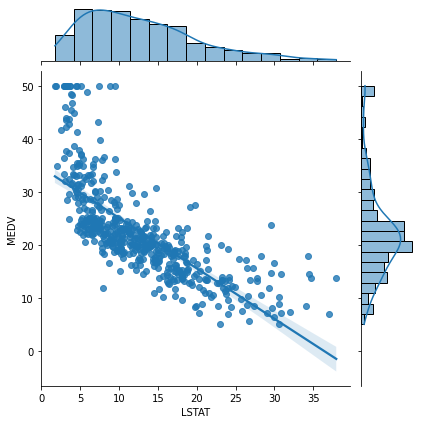

In [96]:
sns.jointplot(x="LSTAT",y="MEDV",data=data,kind="reg");

In [97]:
X=data.drop(["MEDV"],axis=1)
y=data["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [98]:
knn_regressor=KNeighborsRegressor().fit(X_train,y_train)
knn_regressor.n_neighbors

5

# PREDICTION

In [99]:
y_pred=knn_regressor.predict(X_test)

In [100]:
print("MSE: ",mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

MSE:  30.94554736842105
RMSE:  5.562872222909767


### Let's see effect of k (n_neighbors)

In [101]:
MSE=[]
RMSE=[]

for k in range(10):
    k=k+1
    knn_regressor=KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_pred=knn_regressor.predict(X_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    MSE.append(mse)
    RMSE.append(rmse)
    print("k= ",k, " MSE: ",mse," RMSE: ",rmse)

k=  1  MSE:  38.376513157894735  RMSE:  6.194877977643687
k=  2  MSE:  33.923503289473686  RMSE:  5.82438866229527
k=  3  MSE:  28.149334795321632  RMSE:  5.305594669339303
k=  4  MSE:  29.36787828947368  RMSE:  5.419213807322394
k=  5  MSE:  30.94554736842105  RMSE:  5.562872222909767
k=  6  MSE:  33.619482821637426  RMSE:  5.798231007957291
k=  7  MSE:  34.83564446831364  RMSE:  5.902172859914698
k=  8  MSE:  36.05690481085527  RMSE:  6.004740195117127
k=  9  MSE:  38.105980344379475  RMSE:  6.173004158785208
k=  10  MSE:  37.84585592105264  RMSE:  6.151898562318192


# **MODEL TUNING**
 * Lets find best k value with Grid Search

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
knn_params={"n_neighbors":np.arange(1,30,1)}

In [104]:
knn=KNeighborsRegressor()

In [105]:
knn_gridSearch=GridSearchCV(knn,knn_params,cv=10).fit(X_train,y_train)

In [106]:
knn_gridSearch.best_params_

{'n_neighbors': 6}

<a id="15"></a>

# **SUPPORT VECTOR REGRESSION**

In [107]:
diabetes=pd.read_csv("../input/diabetes-data-set/diabetes.csv")
data=diabetes.copy()
data=data.dropna()
X=data.drop(["Outcome"],axis=1)
y=data["Outcome"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [108]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [109]:
svc_model=SVC(kernel="rbf").fit(X_train,y_train)

# PREDICTION

In [110]:
y_pred=svc_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7359307359307359

# **MODEL TUNING**

In [111]:
svc_params={"C":[0.0001,0.1],
           "gamma":[0.0001,1.5]}
svc=SVC()
svc_gridSearch=GridSearchCV(svc,svc_params,cv=10,n_jobs=-1,verbose=2)
svc_gridSearch.fit(X_train,y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.1], 'gamma': [0.0001, 1.5]},
             verbose=2)

In [112]:
svc_gridSearch.best_params_

{'C': 0.1, 'gamma': 0.0001}

<a id="16"></a>

# **REGRESSION TREES**
* Predict continuous valued outputs.

In [113]:
data=pd.read_csv("../input/the-boston-houseprice-data/boston.csv")
data.head()
data=data.dropna()
X=data.drop(["MEDV"],axis=1)
y=data["MEDV"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [114]:
from sklearn.tree import DecisionTreeRegressor

In [115]:
regg_tree=DecisionTreeRegressor(max_leaf_nodes=10)
#?regg_tree

In [116]:
regg_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

# PREDICTION

In [117]:
y_pred=regg_tree.predict(X_test)
mean_squared_error(y_test,y_pred)

16.155491643578205

# **MODEL TUNING**

In [118]:
regg_tree_params={"min_samples_split":range(2,7),
                 "max_leaf_nodes":range(2,7)}

In [119]:
regg_tree_gridSearch=GridSearchCV(regg_tree,regg_tree_params,cv=10)

In [120]:
regg_tree_gridSearch.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(max_leaf_nodes=10),
             param_grid={'max_leaf_nodes': range(2, 7),
                         'min_samples_split': range(2, 7)})

In [121]:
regg_tree_gridSearch.best_params_

{'max_leaf_nodes': 6, 'min_samples_split': 5}

<a id="17"></a>

# **BAGGED TREES**
* Bootstrap aggregation, or bagging, is a general-purpose procedure for reducing the variance of a statistical learning method.
* **Bootstrapping** is the process of randomly sampling subsets of a dataset over a given number of iterations and a given number of variable

In [122]:
data=pd.read_csv("../input/the-boston-houseprice-data/boston.csv")
data.head()
data=data.dropna()
X=data.drop(["MEDV"],axis=1)
y=data["MEDV"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [123]:
from sklearn.ensemble import BaggingRegressor

In [124]:
bagged_model=BaggingRegressor(bootstrap_features=True)
bagged_model.fit(X_train,y_train)

BaggingRegressor(bootstrap_features=True)

In [125]:
bagged_model.estimators_

[DecisionTreeRegressor(random_state=81433145),
 DecisionTreeRegressor(random_state=192572965),
 DecisionTreeRegressor(random_state=1140512436),
 DecisionTreeRegressor(random_state=679409625),
 DecisionTreeRegressor(random_state=207583742),
 DecisionTreeRegressor(random_state=2068160951),
 DecisionTreeRegressor(random_state=801106340),
 DecisionTreeRegressor(random_state=727968992),
 DecisionTreeRegressor(random_state=634180627),
 DecisionTreeRegressor(random_state=705257868)]

In [126]:
# Samples of each tree:
bagged_model.estimators_samples_

[array([304, 285, 315, 105, 156, 244, 254, 202, 323,  30,  57,  36, 321,
        261, 318, 226, 108,  83, 182,  94, 114, 338, 281,  32, 244, 292,
        272,  93, 319, 269, 231, 175, 141, 122, 304,  15, 165,  59, 140,
        235,  42,  28, 288, 112, 118, 312, 318, 137,  47, 100, 253, 150,
        241, 345,  57, 110, 147, 325, 352, 179, 250, 171, 216, 345, 136,
        303, 124,  63, 116, 130, 170,  57, 334,  11, 105,  57,  28, 182,
        213, 144, 117, 129, 221, 195,  74, 332, 254, 240,  68, 169, 347,
        118, 111,  28,  52, 136,   9, 323, 349,  27, 295, 345,  52, 228,
        240, 190, 140,  60,  51, 345, 127,  81, 216, 158, 285, 174, 297,
        179,  33, 247, 271,  11, 219, 215,  92, 143, 206,  37, 218, 160,
        186,  11, 249, 182, 113,  11,  38, 119, 104, 176,  35, 312, 289,
        205, 279, 141,  45,  29, 131, 251, 157, 303, 155, 276,  43, 228,
         16, 145,  77, 268,  19,  26,  13, 284,  86, 132, 120, 340,  42,
        167, 160, 255, 291, 225,  48, 352, 339, 236

In [127]:
# Independent variables of each tree:
bagged_model.estimators_features_

[array([ 9,  4,  4,  1,  1,  4, 12, 12, 10, 10,  2,  3,  8]),
 array([ 5,  0,  0,  2,  5,  7,  3, 11, 11,  8, 10,  6,  0]),
 array([ 4,  7,  6, 10,  2, 10, 11,  3,  0,  0,  7,  0,  1]),
 array([ 9,  0, 10,  3,  8, 10,  3, 11,  3,  1,  6, 12,  3]),
 array([10,  8,  2,  7,  2, 10,  0,  8,  5,  9,  3,  6,  7]),
 array([ 7, 11,  3, 11,  6,  1,  4,  4,  3,  2,  9, 11,  0]),
 array([ 4,  4,  1,  4, 10,  8,  5,  7,  6,  6,  8,  4,  2]),
 array([0, 0, 5, 9, 6, 4, 3, 7, 3, 1, 9, 3, 2]),
 array([ 3,  1,  6,  1,  1, 10,  9,  4, 12,  7,  0,  0,  7]),
 array([12,  0,  3,  5,  6,  0,  4, 10,  4,  3,  0,  4,  0])]

In [128]:
# Values of each model:
bagged_model.estimators_[5]

DecisionTreeRegressor(random_state=2068160951)

# PREDICTION

In [129]:
y_pred=bagged_model.predict(X_test)
mean_squared_error(y_test,y_pred)

16.00094868421053

### > There are a lot of trees that make the prediction

### > 11.85 the common decision of these trees.

In [130]:
# Lets look all trees:
for i in range(0,len(bagged_model.estimators_features_)):
    
    other_y_pred=bagged_model.estimators_[i].fit(X_train,y_train).predict(X_test)
    print("Tree: ",i,"MSE: ",mean_squared_error(other_y_pred,y_test))

Tree:  0 MSE:  10.77763157894737
Tree:  1 MSE:  11.439276315789476
Tree:  2 MSE:  11.365526315789475
Tree:  3 MSE:  11.695131578947368
Tree:  4 MSE:  19.290394736842106
Tree:  5 MSE:  11.892565789473686
Tree:  6 MSE:  10.68486842105263
Tree:  7 MSE:  19.465526315789475
Tree:  8 MSE:  11.255723684210528
Tree:  9 MSE:  11.095394736842104


# **MODEL TUNING**

In [131]:
bag_params={"n_estimators":range(2,7)}

In [132]:
bag_gridSearch=GridSearchCV(bagged_model,bag_params,cv=10)

In [133]:
bag_gridSearch.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 7)})

In [134]:
bag_gridSearch.best_params_

{'n_estimators': 5}

<a id="18"></a>

# **RANDOM FORESTS**
* Evaluation of the predictions produced by multiple decision trees by bringing them together.
* Derived from Bagged Trees.

In [135]:
from sklearn.ensemble import RandomForestRegressor

In [136]:
rf_model=RandomForestRegressor(random_state=42)

In [137]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [138]:
rf_model.n_estimators

100

# PREDICTION

In [139]:
y_pred=rf_model.predict(X_test)
mean_squared_error(y_pred,y_test)

9.619662013157892

# **MODEL TUNING**

In [140]:
rf_params={"max_depth":list(range(1,10)),
          "max_features":[3,5],
          "n_estimators":[100,200]}

In [141]:
rf_gridSearch=GridSearchCV(rf_model,rf_params,cv=10)

In [142]:
rf_gridSearch.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5], 'n_estimators': [100, 200]})

In [143]:
rf_gridSearch.best_params_

{'max_depth': 8, 'max_features': 5, 'n_estimators': 200}

<a id="19"></a>

# **GRADIENT BOOSTING MACHINES**

*  Boosting is a method of converting weak learners into strong learners.

<a id="20"></a>

# **ADAPTIVE BOOSTING (AdaBoost)**

* Initialise the dataset and assign equal weight to each of the data point.
* Provide this as input to the model and identify the wrongly classified data points.
* Increase the weight of the wrongly classified data points.

In [144]:
from sklearn.ensemble import GradientBoostingRegressor

In [145]:
adaBoost_model=GradientBoostingRegressor()
adaBoost_model.fit(X_train,y_train)

GradientBoostingRegressor()

# PREDICTION

In [146]:
y_pred=adaBoost_model.predict(X_test)
mean_squared_error(y_pred,y_test)

8.258608066883044

# **MODEL TUNING**

In [147]:
adaBoost_params={
    "learning_rate":[0.001,0.01],
    "max_depth":[3,5],
    "n_estimators":[200,500],
    "subsample":[1,0.5]
}

In [148]:
adaBoost_gridSearch=GridSearchCV(adaBoost_model,adaBoost_params,cv=10,verbose=2,n_jobs=-1)
adaBoost_gridSearch.fit(X_train,y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01], 'max_depth': [3, 5],
                         'n_estimators': [200, 500], 'subsample': [1, 0.5]},
             verbose=2)

In [149]:
adaBoost_gridSearch.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.5}

In [150]:
Importance = pd.DataFrame({"Importance": adaBoost_model.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Importance of Features')

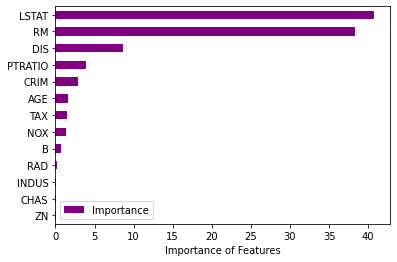

In [151]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "purple")

plt.xlabel("Importance of Features")

<a id="21"></a>

# **EXTREME GRADIENT BOOSTING (xgBOOST)**
* XGBoost is an implementation of Gradient Boosting.
* Decision trees are created in sequential form.

In [152]:
from xgboost import XGBRegressor

In [153]:
xgb_model=XGBRegressor().fit(X_train,y_train)

# PREDICTION

In [154]:
y_pred=xgb_model.predict(X_test)
mean_squared_error(y_pred,y_test)

9.238913131574064

# **MODEL TUNING**

In [155]:
xgb_params={
    
    "colsample_bytree":[0.4,0.5],
    "learning_rate":[0.1,0.01],
    "max_depth":[2,3],
    "n_estimators":[100,200]
}

# colsample_bytree: Number of sample per tree.
# max_depth: Prevent to overfit

In [156]:
xgb_gridSearch=GridSearchCV(xgb_model,xgb_params,cv=10,n_jobs=-1,verbose=2)
xgb_gridSearch.fit(X_train,y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END .............................C=0.0001, gamma=0.0001; total time=   0.0s
[CV] END ................................C=0.0001, gamma=1.5; total time=   0.0s
[CV] END ................................C=0.0001, gamma=1.5; total time=   0.0s
[CV] END ................................C=0.1, gamma=0.0001; total time=   0.0s
[CV] END ................................C=0.1, gamma=0.0001; total time=   0.0s
[CV] END ................................C=0.1, gamma=0.0001; total time=   0.0s
[CV] END ................................C=0.1, gamma=0.0001; total time=   0.0s
[CV] END ...................................C=0.1, gamma=1.5; total time=   0.0s
[CV] END ...................................C=

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat_to_onehot=4, max_delta_step=0,
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_

In [157]:
xgb_gridSearch.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 200}

<a id="22"></a>

# **LIGHT GRADIENT BOOST MACHINE**


### > LightGBM is significantly faster than XGBoost but delivers almost equivalent performance.

In [158]:
from lightgbm import LGBMRegressor

In [159]:
lgbm_model=LGBMRegressor().fit(X_train,y_train)

# PREDICT

In [160]:
y_pred=lgbm_model.predict(X_test)
mean_squared_error(y_test,y_pred)

11.346167217013914

# **MODEL TUNING**

In [161]:
lgbm_param={
    "learning_rate":[0.01,0.1],
    "n_estimators":[20,40],
    "max_depth":[1,2,3],
    "colsample_bytree": [0.4,0.5]
}
lgbm_gridSearch=GridSearchCV(lgbm_model,lgbm_param,cv=10,n_jobs=-1,verbose=2)

In [162]:
lgbm_gridSearch.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5],
                         'learning_rate': [0.01, 0.1], 'max_depth': [1, 2, 3],
                         'n_estimators': [20, 40]},
             verbose=2)

In [163]:
lgbm_gridSearch.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 40}

<a id="23"></a>

# **CATEGORICAL BOOSTING (CatBoost)**
* CatBoost is an alternative to XGBoost. 
* It has the following special features: Can handle categorical features directly **without encoding**.

In [164]:
from catboost import CatBoostRegressor

In [165]:
categoricalBoost=CatBoostRegressor()
categoricalBoost_model=categoricalBoost.fit(X_train,y_train)

Learning rate set to 0.034747
0:	learn: 9.1779763	total: 56.7ms	remaining: 56.7s
1:	learn: 8.9970460	total: 58.1ms	remaining: 29s
2:	learn: 8.8043599	total: 59.4ms	remaining: 19.7s
3:	learn: 8.6435343	total: 61ms	remaining: 15.2s
4:	learn: 8.4691768	total: 62.3ms	remaining: 12.4s
5:	learn: 8.3288598	total: 63.7ms	remaining: 10.6s
6:	learn: 8.1691199	total: 65ms	remaining: 9.23s
7:	learn: 8.0169257	total: 66.6ms	remaining: 8.26s
8:	learn: 7.8793948	total: 67.9ms	remaining: 7.48s
9:	learn: 7.7250018	total: 69.2ms	remaining: 6.85s
10:	learn: 7.5970606	total: 70.5ms	remaining: 6.34s
11:	learn: 7.4640548	total: 71.9ms	remaining: 5.92s
12:	learn: 7.3270633	total: 73.1ms	remaining: 5.55s
13:	learn: 7.1842056	total: 74.4ms	remaining: 5.24s
14:	learn: 7.0660642	total: 75.8ms	remaining: 4.98s
15:	learn: 6.9359083	total: 77.1ms	remaining: 4.74s
16:	learn: 6.8168491	total: 78.4ms	remaining: 4.53s
17:	learn: 6.6951304	total: 79.8ms	remaining: 4.35s
18:	learn: 6.5811814	total: 81.3ms	remaining: 4.2s

# PREDICTION

In [166]:
y_pred=categoricalBoost_model.predict(X_test)

# **MODEL TUNING**

In [167]:
catb_params={
    "learning_rate": [0.01,0.03],
    "iterations": [200,1000],
    "depth":[3,4]
}

In [168]:
catB=CatBoostRegressor()
catb_cv_model=GridSearchCV(catB,catb_params,cv=10,verbose=2,n_jobs=-1)

In [169]:
catb_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits

[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=40; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=40; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=1, n_estimators=40; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=2, n_estimators=20; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=2, n_estimators=20; total time=   0.0s
[CV] END colsample_bytree=0.4, learning_rate=0.01, max_depth=2, n_estimators=20; total time=   0.0s
[CV] END colsample_bytree=0.4, learnin

GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostRegressor object at 0x7fc3725f13d0>,
             n_jobs=-1,
             param_grid={'depth': [3, 4], 'iterations': [200, 1000],
                         'learning_rate': [0.01, 0.03]},
             verbose=2)

In [170]:
catb_cv_model.best_params_

{'depth': 4, 'iterations': 1000, 'learning_rate': 0.03}

<a id="24"></a>

# **ARTIFICIAL NEURAL NETWORK (ANN)**

In [171]:
from sklearn.preprocessing import StandardScaler

In [172]:
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [173]:
from sklearn.neural_network import MLPRegressor
# Multi - Layer Perception

In [174]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [175]:
mlp_model=MLPRegressor(hidden_layer_sizes=(100,20)).fit(X_train_scaled,y_train)

In [176]:
mlp_model.n_layers_

4

In [177]:
mlp_model.hidden_layer_sizes

(100, 20)

# PREDICTION

In [178]:
y_pred=mlp_model.predict(X_test_scaled)
mean_squared_error(y_pred,y_test)

14.030500048263518

# **MODEL TUNING**

In [179]:
mlp_params={"alpha":[0.1,0.01],
           "hidden_layer_sizes":[(20,20),(100,50,)],
           "activation":["relu","logistic"]}

In [180]:
mlp_gridSearch=GridSearchCV(mlp_model,mlp_params,cv=10)
mlp_gridSearch.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01],
                         'hidden_layer_sizes': [(20, 20), (100, 50)]})

In [181]:
mlp_gridSearch.best_params_

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50)}

<a id="25"></a>

# **CLASSIFICATION**
* Binary Classification

* Multiclass Classification
    * We are trying to predict results in a discrete output. 
    * In other words, we are trying to map input variables into discrete categories.

### **DISCRETE VARIABLE**  is a variable whose value is obtained by counting.

   * Example for dicrete variable:
   
        -students’ grade level
        
        -number of students present


<a id="26"></a>

# **LOGISTIC REGRESSION**

* Predict a binary outcome, such as yes or no, based on prior observations of a data set.


In [182]:
data=pd.read_csv("../input/diabetes-data-set/diabetes.csv")
data=data.dropna()
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

## **1) MODELLING with STATS**

In [183]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [184]:
y=data["Outcome"]
X=data.drop(["Outcome"],axis=1)

In [185]:
logistic=sm.Logit(y,X)
logistic_mod=logistic.fit()
logistic_mod.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Fri, 05 Aug 2022   Pseudo R-squ.:                 0.05922
Time:                        14:32:00   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

## **2) MODELLING with SCIKIT-LEARN**

In [186]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(solver="liblinear")
logistic_model=logistic.fit(X,y)
logistic_model

LogisticRegression(solver='liblinear')

In [187]:
print("Intercept | Constant of Logistic Regression Equation: ",logistic_model.intercept_)
print("Coefficient of Linear Logistic Equation: ",logistic_model.coef_)

Intercept | Constant of Logistic Regression Equation:  [-5.89249766]
Coefficient of Linear Logistic Equation:  [[ 1.17061865e-01  2.83893855e-02 -1.68880903e-02  7.55635388e-04
  -6.42919999e-04  5.97757973e-02  6.77489484e-01  7.24167534e-03]]


# PREDICTION

In [188]:
from sklearn.metrics import confusion_matrix,classification_report

In [189]:
y_pred=logistic_model.predict(X)
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]])

In [190]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



# **RECEIVER OPERATING CHARACHTERISTICS (ROC) CURVE**
* Considers all possible tresholds for given classifier.
* Instead of reporting precision and recall, it shows the false positive rate (FPR) against the true positive rate (TPR).

In [191]:
from sklearn.metrics import roc_curve,roc_auc_score

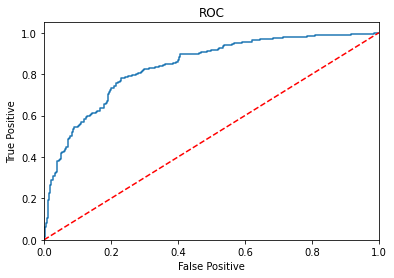

In [192]:
logistic_roc_auc=roc_auc_score(y,logistic_model.predict(X))

fpr,tpr,thresholds=roc_curve(y,logistic_model.predict_log_proba(X)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="AUC (area=%0.2f)"%logistic_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC")
plt.show()

In [193]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.30,random_state=42)
logistic_model.fit(X_train,y_train)
logistic_model

LogisticRegression(solver='liblinear')

In [194]:
accuracy_score(y_test,logistic_model.predict(X_test))

0.7532467532467533

In [195]:
cross_val_score(logistic_model,X_test,y_test,cv=10).mean()

0.7748188405797102

<a id="27"></a>

# **NAVIE BAYES CLASSIFIER**
* It is a probability-based modeling technique.
* Based on Bayes Theorem:

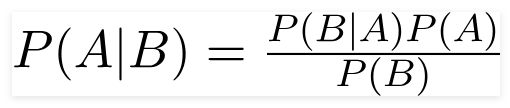

* Predictors/features are independent. 
* That is presence of one particular feature does not affect the other. Hence it is called naive.

In [196]:
data=pd.read_csv("../input/diabetes-data-set/diabetes.csv")
data=data.dropna()
y=data["Outcome"]
X=data.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.30,random_state=42)

In [197]:
from sklearn.naive_bayes import GaussianNB

In [198]:
navie=GaussianNB()
navie_model=navie.fit(X_train,y_train)

# PREDICTION

In [199]:
navie_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [200]:
navie_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [201]:
y_pred=navie_model.predict(X_test)

In [202]:
accuracy_score(y_test,y_pred)

0.7445887445887446

In [203]:
cross_val_score(navie_model,X_test,y_test,cv=10).mean()

0.775

<a id="28"></a>

# **K-NEAREST NEIGHBOOR CLASSIFIER**

In [204]:
from sklearn.neighbors import KNeighborsClassifier

In [205]:
knn=KNeighborsClassifier()
knn_model=knn.fit(X_train,y_train)

# PREDICTION

In [206]:
y_pred=knn_model.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("-------------------------------------------------------------")
print("Report: ",classification_report(y_test,y_pred))

Accuracy Score:  0.6883116883116883
-------------------------------------------------------------
Report:                precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



# **MODEL TUNING**

In [207]:
knn_params={"n_neighbors":np.arange(1,50)}

In [208]:
knn=KNeighborsClassifier()
knn_gridSearch=GridSearchCV(knn,knn_params,cv=10)
knn_gridSearch.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [209]:
print("Best Score: " + str(knn_gridSearch.best_score_))
print("Best Parameters: " + str(knn_gridSearch.best_params_))

Best Score: 0.748637316561845
Best Parameters: {'n_neighbors': 11}


<a id="29"></a>

# **CLASSIFICATION TREES**

In [210]:
from sklearn.tree import DecisionTreeClassifier

In [211]:
decision_tree=DecisionTreeClassifier()
decision_tree_model=decision_tree.fit(X_train,y_train)

# PREDICTION

In [212]:
y_pred=decision_tree_model.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Accuracy Score:  0.7186147186147186


# **MODEL TUNING**

In [213]:
decision_params={"max_depth":range(1,3),
                "min_samples_split":list(range(1,3))}

In [214]:
decision_gridSearch=GridSearchCV(decision_tree,decision_params,cv=10,n_jobs=-1,verbose=2)
decision_gridSearch.fit(X_train,y_train)
decision_gridSearch.best_params_

Fitting 10 folds for each of 4 candidates, totalling 40 fits
856:	learn: 1.0185011	total: 1.44s	remaining: 240ms
857:	learn: 1.0178486	total: 1.44s	remaining: 238ms
858:	learn: 1.0168943	total: 1.44s	remaining: 236ms
859:	learn: 1.0156932	total: 1.44s	remaining: 234ms
860:	learn: 1.0145405	total: 1.44s	remaining: 233ms
861:	learn: 1.0128761	total: 1.44s	remaining: 231ms
862:	learn: 1.0108328	total: 1.44s	remaining: 229ms
863:	learn: 1.0102497	total: 1.44s	remaining: 227ms
864:	learn: 1.0090390	total: 1.44s	remaining: 225ms
865:	learn: 1.0085251	total: 1.44s	remaining: 223ms
866:	learn: 1.0069342	total: 1.44s	remaining: 221ms
867:	learn: 1.0058553	total: 1.44s	remaining: 220ms
868:	learn: 1.0052947	total: 1.44s	remaining: 218ms
869:	learn: 1.0037839	total: 1.45s	remaining: 216ms
870:	learn: 1.0028280	total: 1.45s	remaining: 214ms
871:	learn: 1.0020880	total: 1.45s	remaining: 212ms
872:	learn: 1.0009364	total: 1.45s	remaining: 211ms
873:	learn: 0.9995183	total: 1.45s	remaining: 209ms
874

{'max_depth': 2, 'min_samples_split': 2}

<a id="30"></a>

# **RANDOM FOREST CLASSIFICATION**

In [215]:
from sklearn.ensemble import RandomForestClassifier

In [216]:
randomF_classifier=RandomForestClassifier()
randomF_classifierModel=randomF_classifier.fit(X_train,y_train)

# PREDICTION

In [217]:
y_pred=randomF_classifierModel.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Accuracy Score:  0.7445887445887446


# **MODEL TUNING**

In [218]:
randomF_params={
    "max_depth":[2,5],
    "max_features":[5],
    "n_estimators":[10,500],
    "min_samples_split":[2,5]
}

In [219]:
randomF=RandomForestClassifier()
randomF_gridSearch=GridSearchCV(randomF,randomF_params,cv=10,n_jobs=-1,verbose=2)
randomF_gridSearch.fit(X_train,y_train)
randomF_gridSearch.best_params_

Fitting 10 folds for each of 8 candidates, totalling 80 fits
887:	learn: 1.0764180	total: 2.33s	remaining: 294ms
888:	learn: 1.0756974	total: 2.34s	remaining: 292ms
889:	learn: 1.0743753	total: 2.34s	remaining: 289ms
890:	learn: 1.0729949	total: 2.35s	remaining: 287ms
891:	learn: 1.0718109	total: 2.35s	remaining: 284ms
892:	learn: 1.0703024	total: 2.35s	remaining: 282ms
893:	learn: 1.0698197	total: 2.35s	remaining: 279ms
894:	learn: 1.0689688	total: 2.35s	remaining: 276ms
895:	learn: 1.0681429	total: 2.36s	remaining: 274ms
896:	learn: 1.0676575	total: 2.37s	remaining: 272ms
897:	learn: 1.0673551	total: 2.37s	remaining: 269ms
898:	learn: 1.0669601	total: 2.37s	remaining: 266ms
899:	learn: 1.0662340	total: 2.38s	remaining: 264ms
900:	learn: 1.0648294	total: 2.38s	remaining: 262ms
901:	learn: 1.0635499	total: 2.38s	remaining: 259ms
902:	learn: 1.0628070	total: 2.38s	remaining: 256ms
903:	learn: 1.0616633	total: 2.4s	remaining: 254ms
904:	learn: 1.0613149	total: 2.4s	remaining: 252ms
905:	

{'max_depth': 5,
 'max_features': 5,
 'min_samples_split': 5,
 'n_estimators': 500}

<a id="31"></a>

# **GRADIENT BOOSTING MACHINES**

<a id="32"></a>

# ***ADAPTIVE BOOSTING (AdaBoost)***

In [220]:
from sklearn.ensemble import GradientBoostingClassifier

In [221]:
adaptive=GradientBoostingClassifier()
adaptive_model=adaptive.fit(X_train,y_train)
y_pred=adaptive_model.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Accuracy Score:  0.7445887445887446


> Same model tuning. Grid Search!

<a id="33"></a>

# **LIGHT GRADIENT BOOST MACHINE**

In [222]:
from lightgbm import LGBMClassifier

In [223]:
lightGBM_model=LGBMClassifier().fit(X_train,y_train)
y_pred=lightGBM_model.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Accuracy Score:  0.7229437229437229


<a id="34"></a>

# **EXTREME GRADIENT BOOSTING (xgBOOST)**

In [224]:
import xgboost as xgb
from xgboost import XGBClassifier

In [225]:
xgb_model=XGBClassifier().fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Accuracy Score:  0.7359307359307359


<a id="35"></a>

# **CATEGORICAL BOOSTING (CatBoost)**

In [226]:
from catboost import CatBoostClassifier

In [227]:
cat_model=CatBoostClassifier().fit(X_train,y_train)
y_pred=cat_model.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Learning rate set to 0.0079
0:	learn: 0.6879744	total: 2.92ms	remaining: 2.91s
1:	learn: 0.6843414	total: 3.96ms	remaining: 1.98s
2:	learn: 0.6805760	total: 4.95ms	remaining: 1.65s
3:	learn: 0.6765782	total: 9.55ms	remaining: 2.38s
4:	learn: 0.6720829	total: 10.8ms	remaining: 2.15s
5:	learn: 0.6681617	total: 12ms	remaining: 1.99s
6:	learn: 0.6641912	total: 13.1ms	remaining: 1.86s
7:	learn: 0.6602881	total: 14.4ms	remaining: 1.78s
8:	learn: 0.6562626	total: 15.4ms	remaining: 1.7s
9:	learn: 0.6528483	total: 16.6ms	remaining: 1.64s
10:	learn: 0.6487823	total: 17.8ms	remaining: 1.6s
11:	learn: 0.6454980	total: 18.9ms	remaining: 1.55s
12:	learn: 0.6418953	total: 19.9ms	remaining: 1.51s
13:	learn: 0.6374431	total: 21ms	remaining: 1.48s
14:	learn: 0.6339676	total: 22.2ms	remaining: 1.46s
15:	learn: 0.6304252	total: 23.4ms	remaining: 1.44s
16:	learn: 0.6266998	total: 24.5ms	remaining: 1.41s
17:	learn: 0.6237660	total: 25.6ms	remaining: 1.39s
18:	learn: 0.6204394	total: 26.6ms	remaining: 1.37s


 <a id="36"></a>
 
 # **ARTIFICIAL NEURAL NETWORK**

In [228]:
from sklearn.preprocessing import StandardScaler

In [229]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)

scaler.fit(X_test)
X_test_scaled=scaler.transform(X_test)

In [230]:
from sklearn.neural_network import MLPClassifier

In [231]:
mlpc=MLPClassifier().fit(X_train_scaled,y_train)
y_pred=mlpc.predict(X_test_scaled)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Accuracy Score:  0.7402597402597403


<a id="36"></a>

# **UNSUPERVISED LEARNING**

* Unsupervised learning allows us to approach problems with **little or no idea what our results should look like**. 
* We can derive this structure by **clustering** the data based on relationships among the variables in the data.
* With unsupervised learning there is no feedback based on the prediction results.

<a id="37"></a>

# **K-MEANS CLUSTERING**

* Classifying a given data set into a number of clusters (K)

In [232]:
data=pd.read_csv("../input/usarrests/USArrests.csv",index_col=0)
data=data.dropna()
data.head()

Murder  Assault  UrbanPop  Rape
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6

# **MODEL and VISUALIZATION**

In [233]:
from sklearn.cluster import KMeans

In [234]:
kmeans=KMeans(n_clusters=4)
kmeans_model=kmeans.fit(data)
k_values=kmeans_model.labels_

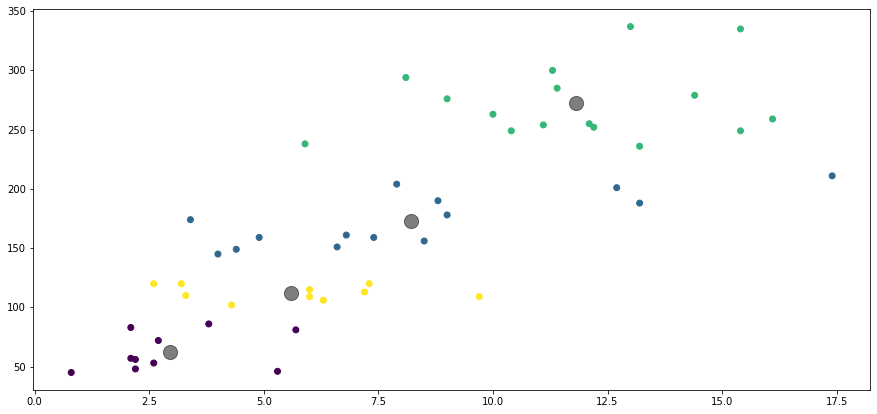

In [235]:
plt.figure(figsize=(15,7))
plt.scatter(data.iloc[:,0],data.iloc[:,1],c=k_values,cmap="viridis");
centers=kmeans_model.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c="black",s=200,alpha=0.5);

# **FINDING BEST K VALUE**

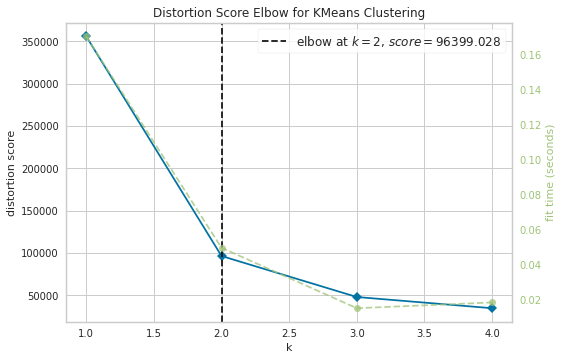

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [236]:
from yellowbrick.cluster import KElbowVisualizer
kmeans_best=KMeans()
visualizer=KElbowVisualizer(kmeans_best,k=range(1,5))
visualizer.fit(data)
visualizer.poof()

<a id="38"></a>

# **HIERARCHICAL CLUSTERING**

In [237]:
from scipy.cluster.hierarchy import linkage

hc_complete=linkage(data,"complete")
hc_average=linkage(data,"average")
hc_single=linkage(data,"single")

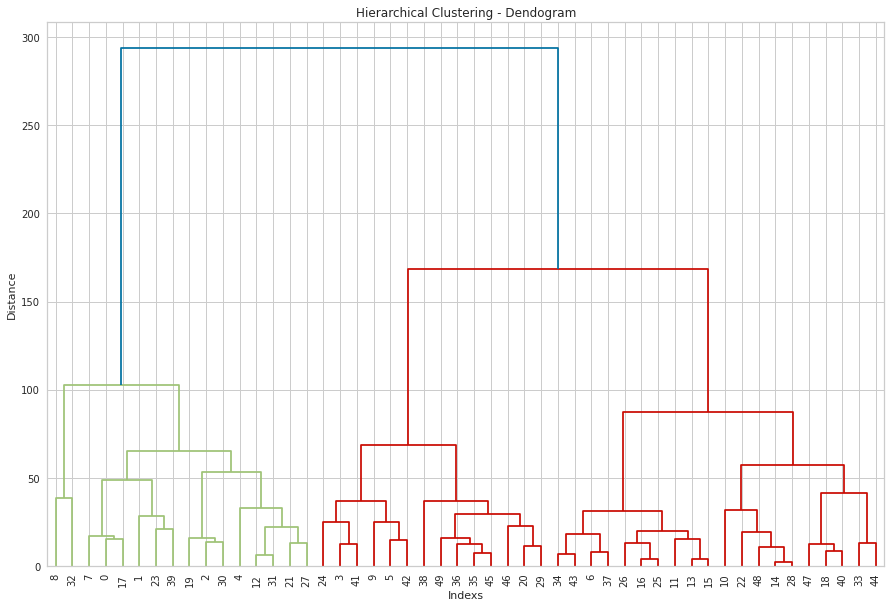

In [238]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15,10))
plt.title("Hierarchical Clustering - Dendogram")
plt.xlabel("Indexs")
plt.ylabel("Distance")

dendrogram(
    hc_complete,
    leaf_font_size=10);


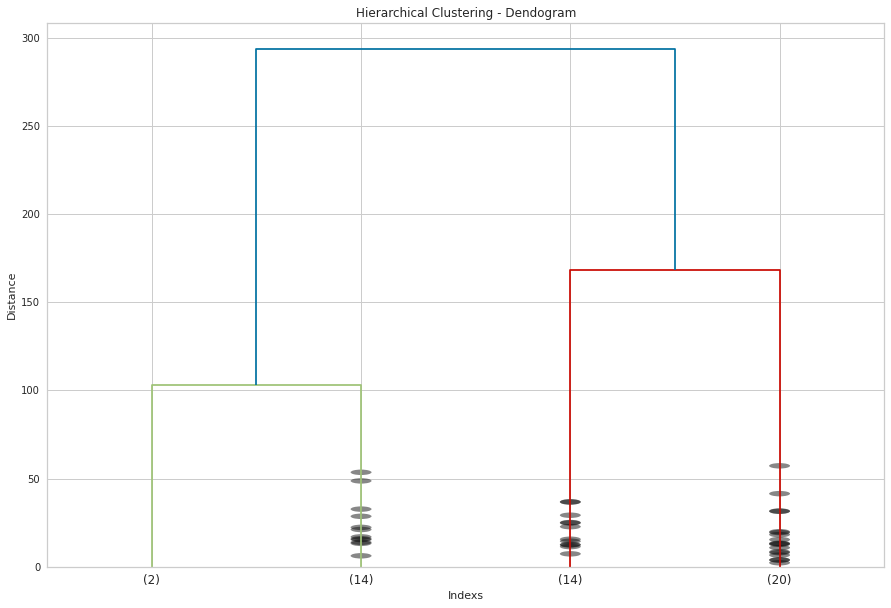

In [239]:
plt.figure(figsize=(15,10))
plt.title("Hierarchical Clustering - Dendogram")
plt.xlabel("Indexs")
plt.ylabel("Distance")

dendrogram(
    hc_complete,
    truncate_mode="lastp",
    p=4, # number of clusters
    show_contracted=True);

In [240]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=4,
                                affinity="euclidean",
                                linkage="ward")

cluster.fit_predict(data)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2])

<a id="39"></a>

# **PRINCIPLE COMPONENT ANALYSIS**

In [241]:
from sklearn.preprocessing import StandardScaler

data=StandardScaler().fit_transform(data)
data[0:5,0:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

In [242]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_fit=pca.fit_transform(data)

In [243]:
pca=PCA().fit(data)

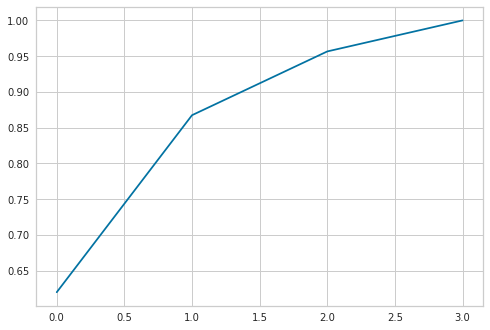

In [244]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));